## Example From Hands On ML Book

I started this challenge I gave myself by following closely through the 2nd chapter of the 3rd edition of Hands On Machine Learning With Scikit-Learn and Tensorflow By Aurelien Geron. The below are my own notes as I worked through this chapter, if you are finding this page and looking for a reference I recommend going to the source. The book has its own github repository also with a jupyter notebook that may be more thorough in places than I have been here. 

### Look At The Big Picture

It helps to have a checklist of what you will go through and do. Example: 
* frame problem and look at big picture
* get data
* explore the data to get insights
* prepare the data to better expose the underlying patterns to ML algorithms
* explore many different models and shortlist the best ones
* fine tune your models and combine them into a great solution
* present your solution
* launch, monitor, and maintain your system


Big picture in this case is what is the objective? even though they might say they want a model, what they use it for is important and will have impact on how the problem is framed, what model is selected, performance metrics used and how much effort is spent tweaking the model.

For this dataset and model we happen to know that the prediction of housing prices will be fed to another ML system with other signals in order to determine whether the area is worth looking into and the model accuracy will have a direct impact on company revenue.

another important thing to consider is how things are working right now. there might be insight to glean from this too such as how much better you can expect performance to get, what has already been tried, etc.

consider whether the problem is a supervised, unsupervised, semi-supervised, or reinforcement learning problem. Also consider whether or not you want it to be a batch or online learning system and whether it is classification, regression or some other type of task. 

things to consider for batch vs online, whether there is continuous data being fed into the system, whether you have the need to adjust quickly to changes in the data, and whether or not the data is small enough to fit into memory. 

### performance measure

this would be something like root mean squared error (RMSE) for a regression problem, maybe cross entropy or somethign else depending on the type of task you are doing.

these amount to distance measures between the vector of predicted values and the vector of target values

the RMSE is a measure of the euclidean norm, or euclidean distance betweeen the vectors. this is called the l2 norm. this is the straight line distance length
for measn absolute error, that is the l1 norm, also known as the manhattan norm because it's distance is like that of a distance where you are on a grid and can't move diagonally
generally the norms for l can go lower than 1 and up to infinite, and as they get larger, they care more and more about distances between vectors that are large and less about small distances. So RMSE is more sensitive to outliers than MAE but performs better if the distribution is gaussian.

### check assumptions

Just a placeholder to make sure that anything you have read into and provided an explanation for should be reexamined. an example of this could be assuming you need to use regression when classification is the better option based on how the predictions of the model will be used.



### Get The Data

In [2]:
import sys
assert sys.version_info >= (3,7)

In [3]:
import sklearn
assert sklearn.__version__ >= "1.0.1"

In [4]:
# attribution here this code is coming from the hands on ml book companion repository for 3rd edition of the book
# https://github.com/ageron/handson-ml3/

from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

### Explore and visualize the data to gain insights

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


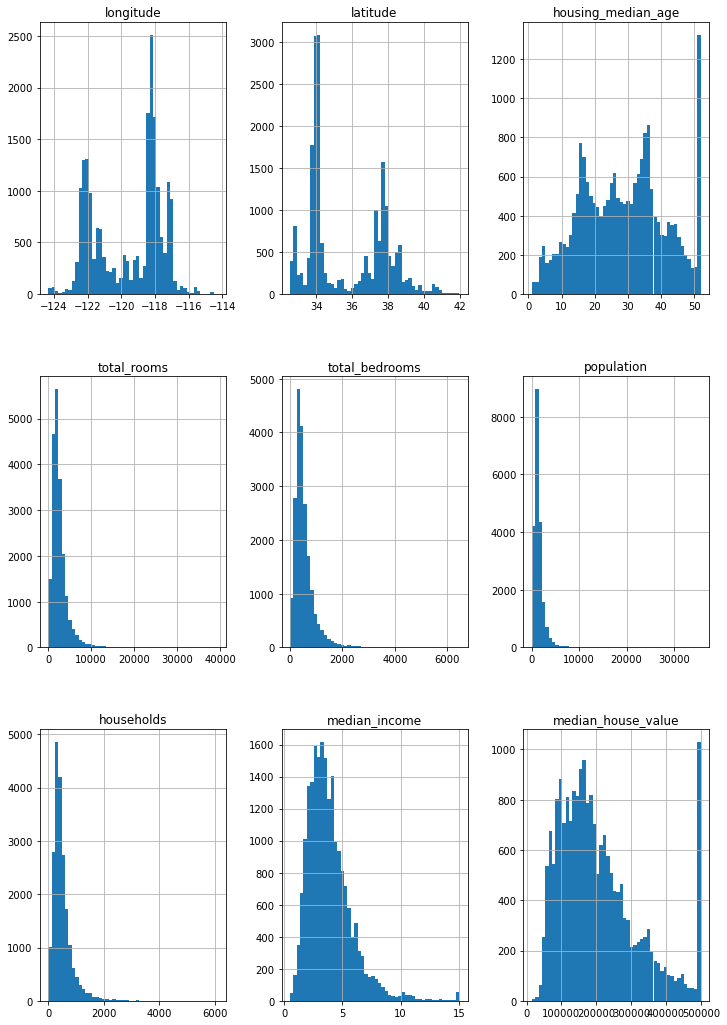

In [9]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12,18))
plt.show()

##### Create A Test Set

you do this before getting too far into your exploratory data analysis, because if you start to detect patterns that bias you you won't realize it, they will impact your model selection and your confidence about generalization. Best to only look at the training dataset first.

In [10]:
import numpy as np 

# this function also from the hands on ml book 3rd edition Geron Aurelien
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = shuffle_and_split_data(housing, 0.2)

print(len(train_set))

print(len(test_set))

16512
4128


##### A Better Way To Split the test set out

We want to be able to repeatedly split up the training and test set, even if new data is added, in such a way that the same data always ends up in each group, but is also as random as can be managed. the above method won't work because it will create a new random group every time so data will migrate back and forth between the test and train set. Seeding the randomization will help, but only if the dataset remains the same and doesn't have new data added to it or any data removed from it. In order to make sure once data has been added to a train or test set it stays there even if the overall dataset grows or shrinks, a technique that is often used os to do a hash of the id of the field and check if that hash is within the desired ratio. in this case, the same observations should always be ending up in the same splits.

In [11]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    """ 
        This uses the crc32 bit hash algorithm of the identifier and then compares the test ratio to the most significant bit by shifting it left 32 places 
    """
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    # get the id, look below and you will see that the was created by reset_index
    ids = data[id_column]
    # make a whole column of boolean indicating whether each row's id is in the test set
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    # split out the train and test sets
    return data.loc[~in_test_set], data.loc[in_test_set]

In [12]:
# since there is no identifier in the dataset itself, we use the row id of the housing dataframe as the identifier to hash with
housing_with_id = housing.reset_index() # reset_index will save the old index into a column with name "index"
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

# this strategy is risky, because if rows get deleted or added before the end you could change the index of the incoming data each time you alter the dataset.


In [13]:
# you can only use the row index if you have control to only add future rows to the end and not delete rows from your dataset. Otherwise, Pick stable features and make them into an id
# done here with lat long

# uncomment to use these instead:
# housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
# train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

##### SKLearn options for train test split

There are a few options. train_test_split() is the most popular, and it will be familiar because it is essentially what is done in the first method covered, shuffle_and_split_data(), where we randomized the order of the indices first and then split the dataset at that point. Note that this doesn't use the hashing strategy to have the dataset split be consistent for future changes. However, you do get the option of a random_state parameter that lets you set the seed for randomizing the data. but, as was discussed before, even if the randomization is consistent every time it doesn't account for changes to the dataset like insertions or deletions from the middle. train_test_split will also split two datasets in the same place, so for instance you can make sure your test data matches up with a separate labels dataset becuase the same indices for the  test observations and labels will be split out from both of these datasets.

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # this is all still from the hands on ML book. . . someone read Hitchiker's Guide :) 

##### Stratified Sampling

If the datset isn't large enough, or if there is something about it that makes it not representative of the whole population, selecting at random may not be good, because there is a higher chance that the sampling will only be from one part of the population and therefore be biased towards the characteristics common to that portion. Stratified sampling is then a technique that is often used, in which information known about the entire population is used to attempt to sample percentages of characteristics that is more representative.

##### Stratified Sampling With a Categorical Variable

This is related to representative sampling. In this dataset, say median income is identified as a good predictor, but it has a continuous value. We want to make sure that all ranges of income, or stratums that you are breaking the dataset into, are well represented. 

In [15]:
housing["income_cat"] = pd.cut(housing["median_income"],
                            bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                            labels=[1,2,3,4,5])

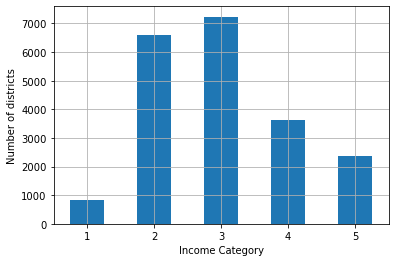

In [16]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()


#### Stratified Sampling Example Continued

so now you know how many instances there are of each median income group in the dataset, you can create a stratified sample for your train test split that ensures the train and test set both get a good representation of data from each of these categories. You can do this with a splitter from the sklearn.model_selection package. 

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.loc[train_index]
    strat_test_set_n = housing.loc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

strat_train_split, strat_test_split = strat_splits[0]

In [18]:
from sklearn.model_selection import train_test_split
# look! we don't have to get all the possible split iterations, we can just get one of them from train_test_split because this is a common use case.
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [19]:
# gives what proportions of the districts belong to each of the income categories 
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

#### Proof that Stratification Reduces Bias When The Dataset Is Smaller
at this point in the Hands On ML book there is a chart presenting how when the split is done as a random shuffle vs stratified sampling, the stratified sampling distribution is much closer to the overall distribution of the population than the random sampling approach for income category.

In [20]:
# removing income category since it was just there to make that point and not part of the modeling that will be done later
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

#### Discover And Visualize Data To Gain Insights
Somethign mentioned in the book that we aren't doing but I should experiment with later, making an exploratory set that allows us to work quickly with the data.

In [21]:
# make sure we are using training set and not test by setting aside a new variable to hold it
# also using copy() function to get a copy and avoid mutating what we will use for model training.
# strat_train_set is a numpy array
housing = strat_train_set.copy()

#### Visualization

Whenever you have geographical component to the dataset, it is useful to visualize that.

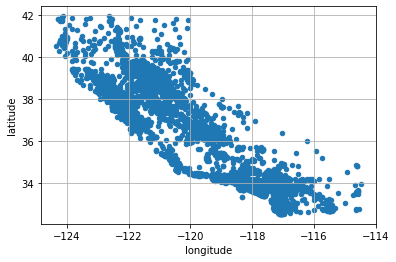

In [22]:
housing.plot(kind="scatter",x="longitude",y="latitude", grid=True)
plt.show()

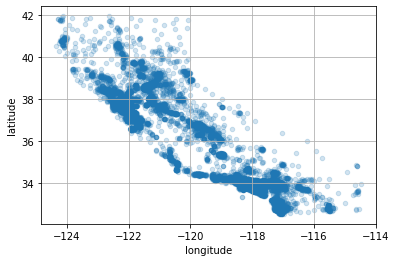

In [23]:
# this doesn't showt the data in as interpretable of a way, but what if we use some transparency so the density of overlapping districts is easier to see?
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

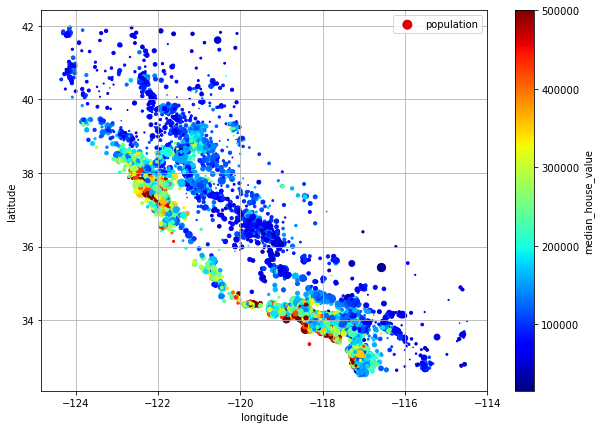

In [24]:
# prices visualization, cool use of color map to visualize the price and using radius of the plotted circles to indicate the population of the district
housing.plot(
    kind="scatter", 
    x="longitude", 
    y="latitude", 
    grid=True, 
    s=housing["population"] /100, 
    label="population",
    c="median_house_value",
    cmap="jet",
    colorbar=True,
    legend=True,
    sharex=False,
    figsize=(10,7))
plt.show()
    


#### Finding Correlations


In [25]:
# this is the correlation function off of a pandas Dataframe api
corr_matrix = housing.corr()

In [26]:
# what is the correlation to our label (median house value)?
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

quick stats refresher, correlation is a float between -1 and 1. 1 is full positive correlation and -1 is full negative correlation and 0 is no correlation. all the values in between are part of a continuous set of values that represent measurements of correlation in betweeen. Correlation is the relationship between the values of these characteristics, so for correlations above 0, when one characteristic's value goes up, the other one goes up by the proportion of the correlation. For correlations below zero when one characteristic's value goes up, the other one will go down by the proportion of the correlation.

##### Finding Correlations Visually
correlation matrix is good for a numerical display of corrleation for one characteristic, but if you want to see all of the characteristics at once, you can use scatter_matrix()

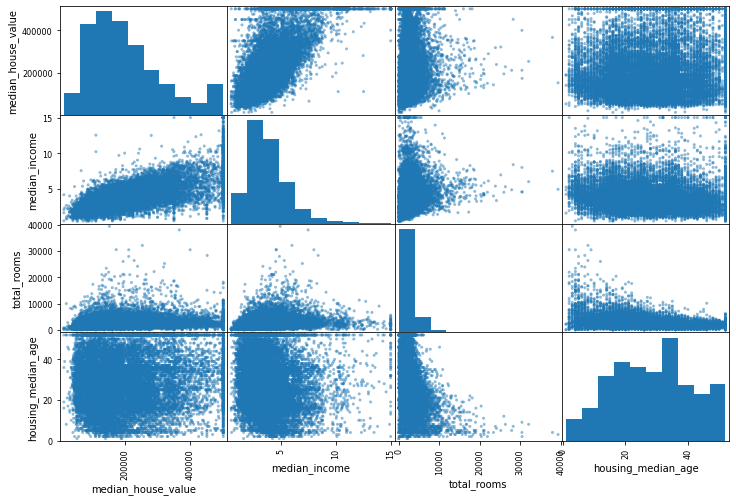

In [27]:
# finding correlation another way, previously we used corr() function 
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
# TIL, figsize is the measurment in inches of the total plot when rendered, also kind of like the aspect ratio
# so 12:8 in this case would be 12 inches wide by 8 inches tall. However, looks to me like the figure is rightsized in the notebook, so might also think of this as 3:2 width to height ratio.
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

#### What we are seeing in the above plot

So this is a matrix of scatterplots where you match up the row and column to find the correlation between two characteristics that were part of that input array. 

For instance, you can see a clear positive linear correlation between median house value and median income, as one goes up the other appears to be also higher and also the values in the scatter part are mostly consistent in their dispersion. the everything below the diagonal is mirrored symmetrically with everything above becauase we are just transposing which characteristic is on the x axis and which is on the y. probably they are all put there just because sometimes it is easier to view from one perspective than the other.

Another thing to note, for the diagonal in the center of the matrix, since there would be perfect correlation between these and themselves, so instead they are just histograms so you can get a sense for the distribution of that characteristic in the dataset. 

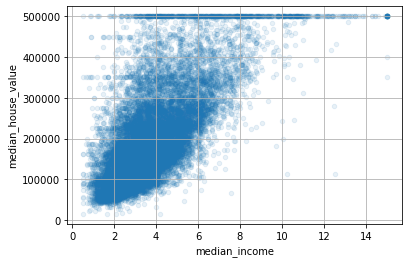

In [28]:
# zooming in on the relationship between median income and median house value
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

some advice on this plot from the book, they point out that the dataset had capped the median home value at 500000 which it had earlier warned coudl ahve the model learn that 500000 was the most a house could be worth, and then they also noted that there were horizontal lines showing up in the plot that defied the correlation pattern of the rest of the data at particular values, like 450,000, 350,000, and 280,000. This might correspond to home prices that are somewhat standard and therefore individuals at all income levels would be more likely to live in them, or maybe some other reason, but in any case, they seem to be oddities that you wouldn't want a model to learn so should probably be deleted. 

it is also important to note that both of the methods we'd looked at with the correlation coefficient only show the linear relationships between the axes. the book provides some plots that you can look at and see clear patterns, like a donut shaped plot or one that follows a sin wave like pattern. It also provides an example of a simple correlation which isn't linear "values for a increase as value for b appraoches 0." All of these are considered non-linear correlations. That becomes important to keep in mind when selecting models for example, because non linear relationships may not be captured by some types of models but that might be the nature of the data.

#### Making New Attributes

some of the attributes are only useful to our purposes if they are combined, in this example the book gives three of those such attribute pairings. Rooms per house combining total households and total rooms per district, rooms to bedrooms similarly, and people per house. 


In [29]:
# creating the 3 new attributes
housing["rooms_per_house"] =  housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [30]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

### Prepare the data for machine learning algorithms

here the book is advocating for building a funcitonal library of data transformations and preprocessing steps that we can recycle for future datsets. That is great because we are going to do at least 9 more! Other advantage is that you can use the functions both in the one time data preparations and cleaning steps and also as part of the live solutions especially in an online learning scenario.

first steps will be to work with a copy of the dataset again. 

In [31]:
# get the unlabeled portion of the train set so drop the label. the drop funciton also implicitly copies so no worries there.
housing = strat_train_set.drop("median_house_value", axis=1)
# get just the labeled copy of the dataframe as its own set
housing_labels = strat_train_set["median_house_value"].copy()


#### Data Cleaning

##### Mising Values

three options available to deal with missing values for an attribute: 
1. delete the rows from the dataset for which the value is missing
2. don't use the attribute that contains missing values (drop it)
3. impute a value for the missing values for that attribute (you have to think about what the best value is to impute, 0, median, mode, some sentinel, etc.)

it is important to weight the pros and cons of each. the third option doesn't result in you losing any data, but depending on how many rows are missign this attribute it may make sense to use 1 or 2 instead for other use cases.

In [32]:
# how to drop the rows 1. 
# housing.dropna(subset=["total_bedrooms"], inplace=True)

# how to drop the problematic attribute's column, 2.
# housing.drop("total_bedrooms", axis=1)

# how to impute a value, in this case we use the median
# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median, inplace=True)

instead of using pandas api methods, we will do this with the sklearn package which has an imputer class available

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [34]:
# get a copy of the dataframe that is just numeric data type columns
housing_num = housing.select_dtypes(include=[np.number])

# there is a fit function in the SimpleImputer that will fit to the dataset
# what this means in this example is that the instance of SimpleImputer has a statistics_ private member variable pointing to a data structure 
# that can store all of the medians of every attribute in housing_num. fit() performs the calculation of each median and the storage.
imputer.fit(housing_num)

SimpleImputer(strategy='median')

fitting the imputer to all the data attributes in our dataset up front will save us time later if we run into the scenario that unseen data has missing values when our solution goes live

In [35]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [36]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [37]:
# Using the instance of SimpleImputer that was fit to the housing dataset
# remember, the only missing values were in the total_bedrooms column so those will be the only ones filled in with the median value
X = imputer.transform(housing_num)

a last note on the SimpleImputer, you can use other strategies, like "mean", "most_frequent" I guess they didn't want to use mode there, and "constant" if you specify another keyword argument called 'fill_value' for the constant to use. "most_frequent" and "constant" can be used for imputing values in non-numeric columns

but wait. . . there's more! sklearn.impute package contains some additional numerical imputers: 
* KNNImputer -  this will use k nearest neighbors across the whole dataset to impute the average taken across the k nearest neighbors to the point represented by the row (used as a feature vector I'm guessing) that is missing a value. You'll probably have to provide a k for this and maybe a distance measure to determine how many other observations in your dateset are used for the averaging and how the distance between the neighbors is determined.
* IterativeImputer - using other features in the observation across other observations in the dateset, train a regression model (I'm guessing you supply it with a split or something since it is supervised, but the label in thi scase would be the target feature for each one). So it builds a regression model to predict the missing values for each of these features separately, and then it imputes the data, and then it uses the data it imputed to iteratively improve on itself, so I guess that improves things because the other features will inform the predictions and then the predictions will have those patterns baked in and so provide a way to measure error for the other regressors. trippy, but very cool sounding.

##### Quick Aside to talk about SKLearn's interface design

The book makes a point to talking about how SKLearn is easy to follow because all of the objects use a similar interface

Objects that estimate parameters using a dataset are referred ot as _estimators_ . they all do this with their _fit()_ member function. _fit()_ takes either one or two params, the dataset for unsupervised and the dataset and another dataset of labels for supervised algorithms. if there are other parameters for estimator objects they are set as hyperparameters which are all instance variables of the estimator objects (these can of course vary by object because different algorithms have different hyperparams). it is usual practice to set these hyperparms by passing them to the constructor of the estimator when instantiating it.

This second behavior overlaps with estimators, like an extension. There is also a set of behaviors that have to do with transofmration of datasets. these are encapsulated by objects known as _transformers_. _estimators_ can be _transformers_, the only requirement for also being a transformer is to have the _transform()_ method, so here we take advantage of duck typing capabilities of python. So _transform()_ takes a dataset as the argument and usually uses paramters that wre learned during a call to _fit()_ on the same object. because that convention is so well followed, all transformers also have a _fit\_transform()_ helper method which performs both parts, and in some cases is optimized in some way so it is even faster than calling fit and then transform.

There is a third thing that estimators can do which is make predictions off of data using data it has never seen before. That is the _predictor_ class of _estimators_. For this behavior there is a predict() method that takes the dataset full of new instances of a datast that the estimator was already fit to and returns a dataset of predictions. There is also _score()_ which will determine the quality of predictions (like the confidence, probability that the prediction is correct). Score needs a test set, and if the algorithm is supervised it also needs labels. 

you can view the hyperparameters for an estimator easily because every instance will have their hyperparams as instance vars. Also you have the public instance vars for learned parameter values and the convention for referring to the learned values is suffixing them with _

scikitlearn actually represents datsets with numpy arrays or scipy sparse matrices, so I've probably messed up once or twice in these notes thinking that I'm getting a pandas dataframe back from some of these calls. hyperparams are strings or numbers, so for example the statistics_ hyperparam that we generated earlier containing the median value for the bedroom attribute was one of those. 

the code is designed in such a way that you can easily combine the classes that sklearn defines into more complex objects in a modular way. there are classes that take estimators of certain kinds and produce estimators of other kinds.

most parameters receive a reasonable default so you can get things working before worrying about tweaking your parameters just right. 

**important thing to note** you can pass numpy arrays or pandas dataframes into sklearn transformers, but they will always return one of the two types just mentioned, either numpy ndarrays or scipy sparse matrices. this is important because dataframes give you an index to work with and columns that are labeled. but let's look at an example of how you could take the output of a transformer and convert it back into a dataframe to work with again. 




In [38]:
# let's do that line again where we use the SimpleImputer to get all of the medians of the housing dataframe
X = imputer.transform(housing_num)

# So X is just a numpy array, let's put the columns and index back and make it a dataframe to work with some more
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

housing_tr.head()
# so you see it is easy if you still have a reference to the dataframe that you started with before transformation. 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292


##### Working With Text and Categorical Variables



In [39]:
# in pandas, we are filtering this dataframe to only contain the ocean proximity column. the double brackets shows this for dataframe filter
housing_cat = housing[["ocean_proximity"]]

In [40]:

housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


this looks like a job for the OrdinalEncoder Class!

In [41]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [42]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

the statistics result is going to be stored as an instance variable, just like explained in the sklearn design section above for transformers. it will be called _categories\__ and it is a list of lists where each list is the categories of a categorical attribute. in our case there will only be the one list for ocean proximity

In [43]:
print(type(ordinal_encoder.categories_))
print(len(ordinal_encoder.categories_))

<class 'list'>
1


one issue to deal with for ML algorithms for some types of categorical features such as the ocean_proximity one we have here, is that these types of categories don't have a natural ordering relationship. in our problem we don't necessarily want the geographic distribution of the categories for how close districts are to the ocean to be learned through these categorical labels. By contrast, for a cut and dry ordinal relationship like placing in a contest you could use integers because the natural ordering of 1st, 2nd, 3rd, etc. is something that we may want to be considered. In our case however, you may not be able to correclty order these 5 ocean proximity variables in a natural sequence, and if the model tries to learn this and incorporate it into its pricing predictions it could perform worse.

to combat this, the common strategy is to use what is called a one-hot encoding. the strategy is to create a binary vector where each of the categories gets a slot, and the value is 1 for whichever slot the category is true for and 0 for all other slots in the vector. 

In [44]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [45]:

housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

##### A note about Sparse Matrices

A scipy sparse matrix is a representation of a matrix that contains mostly zeros that doesn't require space to be reserved for all of those zeros. 

using a sparse matrix has the advantage of saving memory and speeding up computation. lookups are more efficient and storage is reduced. Also, it isn't that different from a 2d array in the way that you operate on it. However, you can also expand it to a dense numpy array using _.toarray()_ on the sparse matrix object.

In [46]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [47]:
# an alternative way to get a dense numpy array directly out of the one hot encoder's transform method
dense_cat_encoder = OneHotEncoder(sparse=False)
dense_cat_encoder.fit_transform(housing_cat)

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [48]:
# using that convention of storing the categories of the transformer in an instance var
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

##### Pandas Alternative encoder and why not to use it

So there is another kid on the block and that is the pandas method _get\_dummies()_ off of the DataFrame class, and that will convert the categorical features in a dataframe directly into one hot encoded values. This is tempting to use, but the recommendation is to stick with the sklearn OneHotEncoder transformer object because it remembers the categories it was trained on and it is important for that the model receive the same values for categorical variables at inference time as it did for training time. This is crucial for the model to perform correctly on that categorical feature. 

if you use _get\_dummies()_ then say the observations fed to your model have fewer or more, new categories, the function won't be able to handle these scenarios. OneHotEncoders will fill in missing values for categories that aren't provided, and it will either throw an exception or if you set the instance var _handle\_unknown_ to "ignore" then it will just set all of the values of that new category to zero. 

In [49]:
# here is an example of pandas get_dummies on a dataframe with a new example missing a few categories, notice how it only has 2 entries
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


In [50]:
# check it out, the OneHotEncoder filled in the zeros for the other two categories
cat_encoder.transform(df_test).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [51]:
# and now showing get_dummies example with pandas when there is a new category "<2H OCEAN" never been seen before, notice how it just adds it without worrying about it
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,1,0
1,0,1


In [53]:
# well, the OneHotEncoder does the work for us by catching that this category doesn't belong, this cell should throw a ValueError exception
cat_encoder.transform(df_test_unknown)

ValueError: Found unknown categories ['<2H OCEAN'] in column 0 during transform

In [ ]:
# alternatively, if we just want to ignore the new categories and add them as a part of the binary array that never has a '1', then we can do that instead. now the 5th entry will always be empty
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown).toarray()

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

##### Another side note about sklearn's internals

SKLearn as part of the fit() method will store an instance variable on the estimator that is used to fit the dataset which is called _feature\_names\_in_. this has teh column names of the dataset that was used for fitting. that way in the future when you pass in a dataframe to the estimator through one of its other methods (transform() or predict()), the dataset will have the same column names. You can also in the case of Transformers use a method called _get\_reature\_names\_out()_ some demo with this encoder I've been working with below. . 

In [ ]:
print(cat_encoder.feature_names_in_)
print(cat_encoder.get_feature_names_out())
print(cat_encoder.transform(df_test_unknown).toarray().shape)
# see how with the get_feature_names_out() method we are able to labeld the columns for the dataframe resulting  from transforming the categorical variable to one hot encodings?
# cool, not sure if this example is as practical yet but we'll see, the ability to make a dataframe out of a transformer must be, having trouble thinking of a good example though, let's
# go through more of the transformation portion of this chapter. a dataframe of the one hot encodings might be good if we want to then make them all columns on our original dataset.

# note, I was getting an exception here about dimensions not lining up between the outgput value of the transform function and the columns and index shapes. this is because I was using sparse
# and the book code assumed I had done the latest recommended action to make the OneHotEncoder output dense vectors. good to know.
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown).toarray(), columns=cat_encoder.get_feature_names_out(), index=df_test_unknown.index)

['ocean_proximity']
['ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND'
 'ocean_proximity_ISLAND' 'ocean_proximity_NEAR BAY'
 'ocean_proximity_NEAR OCEAN']
(2, 5)


##### Final Note on Categorical Encoding

(these notes almost verbatim from Hands on ML again here) sometimes the number of categories is going to be very large and this can impact performance of both training and inference. in these cases, the best solution is often to replace categorical features with numerical representations so that the model can work with them directly. another option is to use optimized encoders from sklearn's category_encoders package. Still another option specifically for neural nets would be to use embeddings, where you replace categories with a low dim vector that can be learned from the dataset. this is an example of _representation learning_ which is covered elsewhere in the hands on ml book. 

#### Feature Scaling and Transformation

this is a really important data transformation step for preparing ML. the different attributes in the dataset will rarely have their respective scales normalized unless the dataset has been preprepared which means some other preprocessing step has done this step in advance. This isn't simply about measuring in the same units or the same measurment system, it is any time where the overall range of values that are possible for one attribute in the dataset differs significantly from the range of values in another attribute. so for the california housing dataset, this is demonstrated comparing number of rooms attribute which is 6 t0 39,320, and median income for the district which is 0 to 15. in cases like these, the many algorithms that models are based from will assume the larger of the two scales is the true scale and will then not think of any of the numbers 0 to 15 as significant for incomes. To try to get the model to consider the ranges independently comes with challenges for many algorithms, for example, what if 0 to 15 isn't the full range of median incomes? even if we know it is up front, programming that into a model would be messy and make it less flexible to change.

##### Common Method For Scaling 1, min-max scaling

also called normalization. shift and rescale the values in each attribute so that they range from 0 to 1 instead of whatever they were ranging before. you just iterate over the lst of values in the attribute, and for each one you subtract the minimum value from the target and then you take that result and divide it by the difference of the maximum value and the minimum value. This guarantees that the minimum value will be zero, the maximum value will be one, and all values in betweeen will be scaled down by the same amount to some fraction in betweeen zero and one so that their relative distances remain unchanged.

In [54]:
# or you can let sklearn do the work for you, and have the added benefit of being able to affect the range (side note did you know that neural networks tend to like zero meaned value sets?
# the values you use and how they are scaled impact how the weights are initialized and also how well the gradient is walked during training iterations, so how fast or slow it converges) 
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

##### Sidenote about not fitting other datasets

you should avoid using the fit or fit_transform functions on an estimator when you are working with a test dataset. they are only for training, when you want to do transform (or predict for that matter) that is fine for these datasets, but you don't need to retrain them. you can do transformation and inference directly.

##### Common Method For Scaling 2, Standardization

whereas min-max will scale each value in the attribute by the proportion given by the distance that value is from the min divided by the total range of possible values, 

standardization will instead first subtract the average value across all values in the attribute from the value it is visiting (which will have the net effect of reducing the avarage across all the numbers to zero), then it will divide by the standard deviation (this will have the effect of reducing the standard deviation across all the values to 1)

standardization doesn't keep the values within a range of 0 to 1 or -1 to 1 the way that min max scaling does, but it is also less impacted by outliers in the data. With min max scaling, when things are scaled down having a large value in the range can still compress the smaller relative ranges into a very small range within the descaled range. Standardization does not do this. 

the name of the transformer that sklearn provides to do standardization is called the `StandardScaler`

In [55]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

##### note about standard scaler with sparse matrices

you don't have to transform a sparse matrix from sci py into a dense one in order to scale it with StandardScaler. there is a `with_mean` hyperparmeter that if you set to `False` will just divide values by the standard deviation without subtracting the mean. You can't subtract the mean from the sparse matrix I suppose because you woulnd't be taking into account all of the zero valued fields? they don't go into detail just say 'breaks sparsity' so that is my interpretation. 

#### smoothing out distributions

with some distributions you can have the phenomenon that values far away from the mean are not exponentially less likely to occur, and for this type of distribution both of these scaling transformations discussed (min max and standardization) will have the effect of compressing the values into a small range. ML models don't do well with this. The hands on ML book mentions it will cover the reason in chapter 4, but I wanted to know now, so peeked ahead. After reading through some sections of that chapter, I believe the allusion made here is just to the fact that algorithms are looking to reduce the different types of error that can come up when applying the algorithm to data and minimizing a cost function, and that outliers are part of the irreducible error that some types of models (such as linear regression) can be prone to fall victim to. with linear regression, for example, one very big outlier could skew the line being learned away from all other data points becuase the other data points are clustered too far together, so the slope of the learned line becomes too impacted from that lone datapoint. This probably could also be shown with a fully worked out solution of sum of squares. _note to self, go back to this and revise if it turns out not to be accurate_

So the point is you have to go for a symmetrical distribution. values that follow a normal looking distribution and are well spaced out. how do you do this when the values are not following this distribution to begin with? For cases where the values form a heavy tail on the right you can take the square root or some other power of the feature values that is between 0 and 1, that would have the effect of reducing the distance between them by a uniform factor, then just make that your feature. Another type of distribution skew is the power log distribution. The book uses population in the housing example, I looked up another one that was a good analogy, the distribution of wealth. power law distributions are when you have only a few cases where something occurs a lot and many cases where it doesn't occur that much. with power law distributions, when you take the log of their values the distribution you get ends up looking much more like a gaussian distrubiton. you can also bucketize features to compensate for heavy tail. in those cases you would replace the feature with the index of the bucket that you assigned it to. so you could use the percentile as the index and split the data into buckets by percentile. As long as the buckets are the same size, you can create something like a uniform distribution this way and then divide the values by the number of buckets and you'd be left with values between 0 and 1.  _need to see some examples and practice this_

Alternative types of non normal distributions would be multi-modal, wehre you have two peaks instead of one. So while heavy tail has the peak too far to one side or doesn't fall off nicely, with these you get two peaks in the values. example given in the book is _housing\_median\_age_ feature. For these you can bucketize them too, but when you do it use the buckets as categories for the features instead of values. You would need to encode the index of each bucket with something like the _OneHotEncoder_ transformer. So you end up with these sections of the data that things fall into, and the model can learn that those sections have patterns. The example given here was the if the houses were built 35 years agove they have a style that people don't normally demand anymore so their prices tend to be lower. Or, instead of bucketizing you can create an additional similarity feature that will represent the similarity between whatever the original feature's value is for that observation and one of the modes you found. You can make one of these for each of the major modes in the target feature. So if the modes for median_housing_age were 10 and 35 (lots of occurrences of each), you could make a similarity feature using something like a _Radial Basis Function_ which will have high output if the housing median age and say 35 years old are a match and then fall off exponentially for values that are away from 35 years old of housing median age. 





In [56]:
# RBF Kernal Example how to use rbf_kernel() with sklearn to make a new feature for hosing median age = 35 similarity to housing_median_age feature
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

you can also transform target feature distributions. you can perform the same types of transformations already mentioned to adjust the scale and distribution for the target features. One thing to keep in mind though if you are going to do that is that the value you are predicting will now need to be transformed back to the value that you wanted to predict in the first place after you get the prediction.

most sklearn transformers come with an _inverse\_transform_ method that will allow you to reverse the transformation that was done. So below is an example of using that with a _StandardScaler_ transformer to get the predicted label's value aback to the unscaled value that we wanted. the example works on a single input feature and then trains regression, note that the scaler takes 2d input so we can't pass a series to it so we transform the series to a dataframe. 

In [57]:
from sklearn.linear_model import LinearRegression


target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
# grab the first 5 rows of median incomes from the training set
some_new_data = housing[["median_income"]].iloc[:5] # pretend this is real data, in reality it is part of the trained dataset so ABS (already been seen)

scaled_predictions = model.predict(some_new_data)
# this is what we are demoing here
predictions = target_scaler.inverse_transform(scaled_predictions)



alternatively, we can use the `TransformedTargetRegressor` from sklearn. It does the same thing just done above, but you pass the scaler to it and it takes care of performing the transformation when fitting and also reversing it for prediction, code to demo that below.

In [58]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

##### Custom Transformers

Since you might run into problems requiring novel transformations, you have this capability in sklearn as well. First of all, if you don't need to train your transformer on the dataset, sklearn custom transformers are overkill. you don't need an estimator for that task, you can just write a function from numpy array to transformed numpy array. here is an example of a transformer that will adjust the values of a heavy tailed distribution to a more normal looking one using a the log of each value. 

In [59]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])


Another example but for a transformer where the function needs hyperparameters as arguments, this is the case with the rbf_kernel

In [60]:
# same thing that was suggested earlier, except we are wrapping the transformation we did in a FunctionTransformer
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])


In [61]:
# and another example to demonstrate that you can't pass multiple features to the transformer and expect a comparison to each, you would get one output that used euclidiean distance from both points
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

notice that you have the kwarg for inverse_func. when you specify this, you could use this transformer with TransformedTargetRegressor as was shown above and it will know how to reverse the transformation.

##### using your own class instead of FunctionTransformer

So if you want to have a transformer that learns some parameters during fit() and then transforms them in transform(), you can just create a class yourself that implements these two methods and also fit transform. fit() returns self. If you inherit from TransformerMixin() class then you get fit_transform() for free. you can also inherit from BaseEstimator (but if you do this you need to avoid allowing your __init__ to take *args and **kwargs) that will give you `get_params()` and `set_params()` which are useful for automatic hyperparmeter tuning. 

basic example of `StandardScaler` like class that uses this approach below.


In [62]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True): # notice lack of args or kwargs here
        self.with_mean = with_mean

    def fit(self, X, y=None): #y is required even though not used
        X = check_array(X) # checks that X is an array with finite float vals
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1] # every estimator stores the num features in fit()
        return self # fit must return self, probably so transformer mixin can chain it with transform

    def transform(self, X):
        check_is_fitted(self) # looking for learned attributes (with a trailing_)
        X = check_array(X)
        if self.n_features_in_ != X.shape[1]:
            # the hands on ml book uses assert to check this but you have to raise an error to be considered a legal transformer
            raise ValueError
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [63]:
# here is an example of using the check_estimator method to see if this custom transformer meets the api standards of sklearn
from sklearn.utils.estimator_checks import check_estimator

check_estimator(StandardScalerClone())

In [64]:
# and here is an example of a custom estimator using other estimators as part of its fit and transform methods. 
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.N_clusters)]


In [65]:
# now we use it, see what it gives us
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
sample_weight=housing_labels)

In [66]:
similarities[:3].round(2)

array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.99, 0.  , 0.6 ],
       [0.63, 0.  , 0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.44, 0.  , 0.7 , 0.  , 0.3 ]])

##### sklearn pipelines

orchestrating all the transformations required can be helped by a pipeline class, sklearn has one such class. 

In [67]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

so the way you would use this is to instantiate the Pipeline object and then in your constructor you pass in a list of tuples. each tuple is a pair of 'name' and then sklearn estimator instances. So your name should be the name of the transformation you are performing there. avoid using common names for the transformations and also don't put underscores in them. Another rule for the estimators, all but the last one in the list need to be transformers so they have a fit_transform method. the last one in the list can be anything, transformer, predictor, etc. 

In [68]:
# cool trick with sklearn to get a diagram for estimators. it gives the pipeline visualized 
import sklearn

sklearn.set_config(display="diagram")

num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

In [69]:
# if you don't want to name your transformers, then you can use make_pipeline instead

from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

how these pipelines work is that their first fit method calls fit_transform() and passes the output of the fit_transform in as the intput to the fit_transform of the next transformer, and then on the final transformer it just calls fit(). 

what the pipeline does after being fitted depends on the final estimator in the pipeline. if it is a transformer then it will chain together all the transformations and then complete after the final transform. if it is a predictor then it will chain the tranformations together but then call predict at the end. 

In [70]:
# following the housing example
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [71]:
# let's get that as a Dataframe instead

# so this doesn't work because simple imputer doesn't implement get_feature_names_out. 
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline[1].get_feature_names_out(),
    index=housing_num.index
)

# two ways to get back to the estimators in the pipeline
print(f"first through the steps attribute: {num_pipeline.steps}")
print(f"second through the name_steps dict: {num_pipeline['simpleimputer']}")

first through the steps attribute: [('simpleimputer', SimpleImputer(strategy='median')), ('standardscaler', StandardScaler())]
second through the name_steps dict: SimpleImputer(strategy='median')


##### Column Transformer

this is a transformer that will apply transformers that are appropriate to each of your respective columns in your dataset. let's see how that works in practice, where you have categorical variables and also numerical variables and you want to transform them for the housing dataset

In [72]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "housholds", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

note about using the ColumnTransformer. for columns that you don't list in one of the transformers in the lists that you have explicity, you can explicitly pass them as a list with the string "drop" instead of a transformer. you can also pass the string "passthrough" for these strings, drop means drop the columns and passthrough means don't transform them. The default for Column transformer is to drop columns that aren't named in one of its transformers, but you can change this using the "remainder" keyword arg in its constructor. 

other useful features, you have a make_column_selector() which will return a selctor function that lets you pick the types of columns you want to have for a given transformation and you can pass it instead of the list of column names to the transformers in your column transformer.

also, there is a make_column_transformer shortcut just like make_pipeline which will not require you to pass names for each of your transformations. since this is a pipeline of pipelines, each of the transformers in the ColumnTransformer made by make_column_transformer will be named something like 'pipeline-1', 'pipeline-2' etc. 

In [73]:
# example of using the column transformers and the column selectors to shorten the above and get rid of decisions you don't really need to think about in this case. 
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    # book had np.object here but that is apparently deprecated, now we can just use 'object'
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

housing_prepared = preprocessing.fit_transform(housing)


##### Quick note about how sparse matrices are handled 
some of the components of this transformation pipeline return sparse matrices and some dense matrices. waht should the representation of the output be? ColumnTransformer tries to figure this out for you. There is a default threshold of 0.3 which corresponds to the amount of density above which the returned matrix should be a dense matrix. So the categorical encoding woudl return a sparse matrix, but then the numerical pipeline returns a dense one, and after estimating the density of the matrix that would result from both transformations being applied, the transformer elects to use the dense matrix because of the density of values in the numerical pipeline output I suppose. 

#### Puttin it all together

In [92]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in 1.0.0."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if self.feature_names_out is None:
                return default_get_feature_names_out(self, names)
            elif callable(self.feature_names_out):
                return self.feature_names_out(names)
            else:
                return self.feature_names_out

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [98]:
def column_ratio(X):
    # this slicing gives you the first and second columns of the dataframe and then you are getting the ratio of them
    return X[:, [0]] / X[:, [1]]

def ratio_pipeline(name=None):
    return make_pipeline(
        # start by imputing the median for all columns
        SimpleImputer(strategy="median"),
        # then pass the output of that imputer's fit_transform to a function transformer that will convert the features to the single ratio feature
        FunctionTransformer(column_ratio, feature_names_out=[name]),
        # now use the StandardScaler to scale the data using standardization, subtract mean and divide by std dev
        StandardScaler())

log_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             FunctionTransformer(np.log),
                             StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

preprocessing = ColumnTransformer([
    ("bedrooms_ratio", ratio_pipeline("bedrooms_ratio"), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline("rooms_per_house"),["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline("people_per_house"), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],remainder=default_num_pipeline)


In [100]:
housing_prepared = preprocessing.fit_transform(housing)
print(housing_prepared.shape)
# this has not been working for me, can't seem to get the feature names 
# I should review the notebook for this instead of the book, found some monkey patching. TODO fixing these transformers so they work. 
# preprocessing.get_feature_names_out()

(16512, 24)


### Select Model and train it

In [101]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=['bedrooms_ratio'],
                                                                                       f...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd5beb44af0>)])),
                ('linearregression', LinearRegression())])

In [102]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([243700., 372400., 128800.,  94400., 328300.])

In [103]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [105]:
#so those are the differences, what is the error? root mean squared error for this RMSE
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)

lin_rmse

68687.89176590109

In [106]:
# take 2 we are using a decision tree regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=['bedrooms_ratio'],
                                                                                       f...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fd5beb44af0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [107]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)

tree_rmse

0.0

#### Cross Validation To Evaluate The Model

In [108]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [109]:
pd.Series(tree_rmses).describe() 

count       10.000000
mean     66868.027288
std       2060.966425
min      63649.536493
25%      65338.078316
50%      66801.953094
75%      68229.934454
max      70094.778246
dtype: float64

In [111]:
# now comparing apples to apples, getting the cross validation numbers for the linear regressor and comparing to the decision tree
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

pd.Series(lin_rmses).describe()

count       10.000000
mean     69858.018195
std       4182.205077
min      65397.780144
25%      68070.536263
50%      68619.737842
75%      69810.076342
max      80959.348171
dtype: float64

Ok, cool so now we see that the linear regressor performs worse than the decision tree model, but not by much, and the decision tree is very overfit to the traning dataset. knowing that overfitting is a likely cause of the only marginal better performance, we can strategically choose random forest, because it will average out several decision trees to arrive at its prediction and that 

In [112]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error")

In [114]:
pd.Series(forest_rmses).describe()

count        5.000000
mean     47291.492691
std        443.113138
min      46825.569436
25%      47119.075661
50%      47217.476035
75%      47273.919754
max      48021.422569
dtype: float64

In [116]:
# TODO test the housing dataset with a few more other model variations, like support vector machine

# assuming random forest is a likely candidate, we can use the GridSearchCV function to do a  hyperparameter space search using cross validation to find the best performing model
from sklearn.model_selection import GridSearchCV
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_grid = [
    {'preprocessing__geo__n_clusters': [5,7,10],
    'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10,15],
    'random_forest__max_features': [6,8,10]},
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms_ratio',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fd5beb44af0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 7, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

### Fine tune your model

### Present Solution

### Launch, Monitor, Maintain Your System